In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from import_me import *

In [2]:
# array = readSave(readfileName = "output.data")
# plt.imshow(plt.imread("output.bmp"))

In [26]:
with open("orig_pinguim.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [27]:
header = orig[:122]
#preamble = np.unpackbits(preamble)

CPU times: user 17.4 s, sys: 35.8 ms, total: 17.5 s
Wall time: 17.5 s


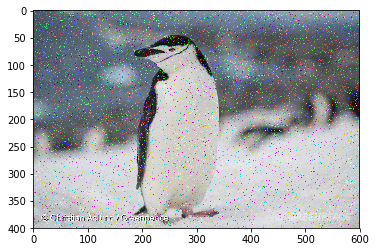

In [30]:
%%time
img = readOutput("output.data", np.array([67, 255], dtype = np.uint8), header, (400, 600))
plt.imshow(img)

CPU times: user 17.4 s, sys: 44 ms, total: 17.5 s
Wall time: 17.5 s


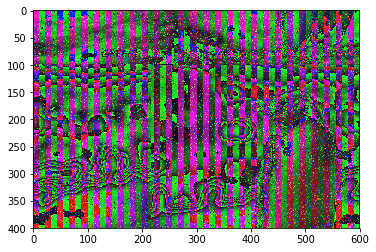

In [34]:
%%time
img = readOutput("output.data", np.array([67 + 128, 255 - 1], dtype = np.uint8), header, (400, 600))
plt.imshow(img)

In [ ]:
####

In [53]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

header = orig[:122]
#preamble = np.unpackbits(preamble)

CPU times: user 4.8 s, sys: 0 ns, total: 4.8 s
Wall time: 4.8 s


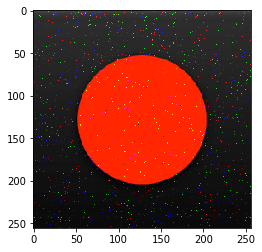

In [54]:
%%time
img = readOutput("output.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
plt.imshow(img)

CPU times: user 4.84 s, sys: 4.02 ms, total: 4.85 s
Wall time: 4.85 s


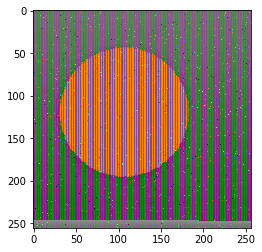

In [58]:
%%time
img = readOutput("output.data", np.array([67 + 128, 255 - 1], dtype = np.uint8), header, (256, 256))
plt.imshow(img)
# mini_header com 1 bit errado (67 -> 66) pode dar os padrão de interferência já encontrados antes quando estava
# usando o tagged_stream_align no gnuradio, melhor não usar esse bloco (usar apenas o stream mux) e processar
# o header em python conforme acima utilizando as funções em import_me

In [ ]:
#####

In [4]:
with open("output.data", "rb") as f:
    b = f.read()
rcv = np.frombuffer(b, dtype = np.uint8)
#rcv = np.roll(np.packbits(np.roll(np.unpackbits(rcv), 7)), 0)

In [5]:
rcv[:100]

array([136,   8,   0, 127, 136,   8,   0, 124, 136,   8,   0, 127, 136,
         8,   0, 127, 136,   8,   0, 127, 136,   8,  96, 127, 136,   8,
         1, 255, 136,   8,   0, 127, 136,   8,   0, 127, 136,   8,  48,
       127, 136,   8,   0, 127, 136,   8,   0, 127, 136,   8,   0, 127,
       136,   8,   0, 127, 136,   8,   0, 127, 184,   8,   0, 127, 136,
         8,   0,  79, 136,   8,   0, 127, 136,   8,   0, 127, 136,   8,
         0, 127, 136,   8,   0, 127, 136,   8,   1, 255, 136,  14,  97,
       255, 136,   8,   0, 127, 139,   8, 192, 127], dtype=uint8)

In [6]:
%%time
result = 0
for bit_shift in range(8):
    aux = np.packbits(np.roll(np.unpackbits(rcv), bit_shift))
    if len(search_sequence_numpy(aux, np.array([0, 255]))) > result:
        result = bit_shift
rcv2 = np.packbits(np.roll(np.unpackbits(rcv), result))
print(rcv2[:100])

[255  16  16   0 255  16  16   0 249  16  16   0 255  16  16   0 255  16
  16   0 255  16  16 192 255  16  16   3 255  16  16   0 255  16  16   0
 255  16  16  96 255  16  16   0 255  16  16   0 255  16  16   0 255  16
  16   0 255  16  16   0 255 112  16   0 255  16  16   0 159  16  16   0
 255  16  16   0 255  16  16   0 255  16  16   0 255  16  16   3 255  16
  28 195 255  16  16   0 255  22  17 128]
CPU times: user 149 ms, sys: 110 µs, total: 149 ms
Wall time: 148 ms


In [7]:
ref, result = len(rcv2), 0
for shiftByte in range(2 + 2):
    aux = np.roll(rcv2, shiftByte)
    aux = np.array([x for i, x in enumerate(aux) if i % 4 >= 2])
    _ = len(search_sequence_numpy(aux, np.array([0, 255])))
    if _ < ref:
        ref = _
        result = shiftByte
info = np.array([x for i, x in enumerate(np.roll(rcv2, result)) if i % 4 >= 2])
info[:100]

array([ 16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16, 112,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  28,  16,  16,  22,  17,  16,  32,
        16,  28,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,   8,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16, 112,  16,  16,  16,   8,  16,  28,  16], dtype=uint8)

In [228]:
info.shape

(196730,)

In [231]:
#search_sequence_numpy(info, np.array([66, 77]))

In [232]:
#findBitShift_and_Begin(info)

In [233]:
preamble = np.array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype = np.uint8)
preamble = np.unpackbits(preamble)
#preamble

In [234]:
np.argmax(np.correlate(np.unpackbits(info), preamble))

1180400

In [235]:
rcv_array = np.packbits(np.roll(np.unpackbits(info), -np.argmax(np.correlate(np.unpackbits(info), preamble))))

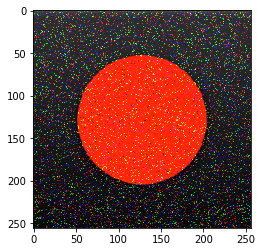

In [236]:
bgr = np.flipud(rcv_array[122:].reshape(256, 256, 3))
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))

In [ ]:
####

In [127]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [128]:
orig[:122]

array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=uint8)

In [130]:
rcv_array[:122]

array([ 66,  77, 122,   0,  51,  12,   0,   0,   0,   0, 124,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,  12,   0,
         1,   6,  24,   0,   0,   0,   0,   0,   0,   0,   3, 192,  19,
        11,   0,   0, 211, 203,   0,   6,   0,   0,   0,   3, 192,   0,
         0,   0,  90,  71,  82, 115,   0,   0,   0,   0,   6,   0,   0,
         0,   0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0,   0,
        12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 192,   0,   0,   0,   0,  48,
         0,   0, 100,   0,   0,   0,  24, 192,   0,   0,   0,  48,   0,
         0,   0,   0,   0,   0], dtype=uint8)

In [132]:
np.sum(np.equal(orig, rcv_array))

162063

In [12]:
#sem hamming: 196606, 196576

In [13]:
#com hamming: 196629, 196639

In [139]:
#byte error rate
len(np.nonzero(orig - rcv_array)[0])/len(orig)

0.1762161337874244

In [147]:
#bit error rate
len(np.nonzero(np.unpackbits(orig) - np.unpackbits(rcv_array))[0]) / len(np.unpackbits(orig))

0.042823921110150966